,Open,High,Low,Close,Volume,Capital Gains,Tomorrow
Date,,,,,,,
1993-01-29 00:00:00-05:00,24.626126,24.626126,24.503608,24.608624,1003200,0.0,24.783649
1993-02-01 00:00:00-05:00,24.626126,24.783649,24.626126,24.783649,480500,0.0,24.836155
1993-02-02 00:00:00-05:00,24.766145,24.853658,24.713637,24.836155,201300,0.0,25.098694
1993-02-03 00:00:00-05:00,24.871160,25.116196,24.853658,25.098694,529400,0.0,25.203693
1993-02-04 00:00:00-05:00,25.186191,25.256201,24.906150,25.203693,531500,0.0,25.186205
...,...,...,...,...,...,...,...
2024-09-23 00:00:00-04:00,569.340027,570.330017,568.099976,569.669983,44116900,0.0,571.299988
2024-09-24 00:00:00-04:00,570.479980,571.359985,567.599976,571.299988,46805700,0.0,570.039978
2024-09-25 00:00:00-04:00,571.140015,571.890015,568.909973,570.039978,38428600,0.0,572.299988


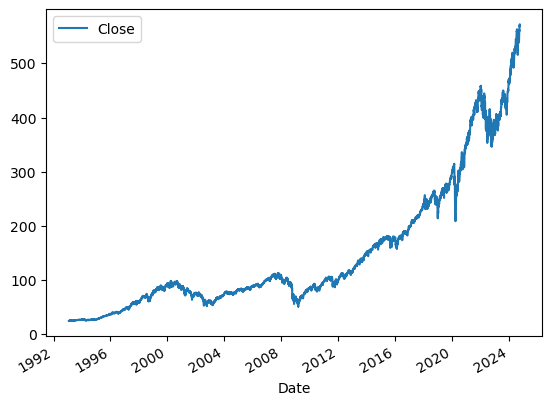

In [1]:
import yfinance as yf
import pandas as pd
import os

sp500 = yf.Ticker("SPY")

sp500 = sp500.history(period="max")

sp500

sp500.index

sp500.plot.line(y="Close", use_index=True)

del sp500["Dividends"]
del sp500["Stock Splits"]

sp500["Tomorrow"] = sp500["Close"].shift(-1)

sp500

In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [3]:
sp500

,Open,High,Low,Close,Volume,Capital Gains,Tomorrow,target
Date,,,,,,,,
1993-01-29 00:00:00-05:00,24.626126,24.626126,24.503608,24.608624,1003200,0.0,24.783649,1
1993-02-01 00:00:00-05:00,24.626126,24.783649,24.626126,24.783649,480500,0.0,24.836155,1
1993-02-02 00:00:00-05:00,24.766145,24.853658,24.713637,24.836155,201300,0.0,25.098694,1
1993-02-03 00:00:00-05:00,24.871160,25.116196,24.853658,25.098694,529400,0.0,25.203693,1
1993-02-04 00:00:00-05:00,25.186191,25.256201,24.906150,25.203693,531500,0.0,25.186205,0
...,...,...,...,...,...,...,...,...
2024-09-23 00:00:00-04:00,569.340027,570.330017,568.099976,569.669983,44116900,0.0,571.299988,1
2024-09-24 00:00:00-04:00,570.479980,571.359985,567.599976,571.299988,46805700,0.0,570.039978,0
2024-09-25 00:00:00-04:00,571.140015,571.890015,568.909973,570.039978,38428600,0.0,572.299988,1


In [5]:
sp500 = sp500.loc["2010-01-01":].copy()

In [6]:
sp500

,Open,High,Low,Close,Volume,Capital Gains,Tomorrow,target
Date,,,,,,,,
2010-01-04 00:00:00-05:00,85.584819,86.361683,84.929813,86.315987,118944600,0.0,86.544472,1
2010-01-05 00:00:00-05:00,86.262671,86.582556,85.950398,86.544472,111579900,0.0,86.605408,1
2010-01-06 00:00:00-05:00,86.460695,86.818664,86.392151,86.605408,116074400,0.0,86.970993,1
2010-01-07 00:00:00-05:00,86.445464,87.077621,86.201741,86.970993,131091100,0.0,87.260414,1
2010-01-08 00:00:00-05:00,86.742503,87.298498,86.567330,87.260414,126402800,0.0,87.382271,1
...,...,...,...,...,...,...,...,...
2024-09-23 00:00:00-04:00,569.340027,570.330017,568.099976,569.669983,44116900,0.0,571.299988,1
2024-09-24 00:00:00-04:00,570.479980,571.359985,567.599976,571.299988,46805700,0.0,570.039978,0
2024-09-25 00:00:00-04:00,571.140015,571.890015,568.909973,570.039978,38428600,0.0,572.299988,1


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [14]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [16]:
preds = pd.Series(preds, index=test.index)

In [18]:
precision_score(test["Target"], preds)

1.0

In [19]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

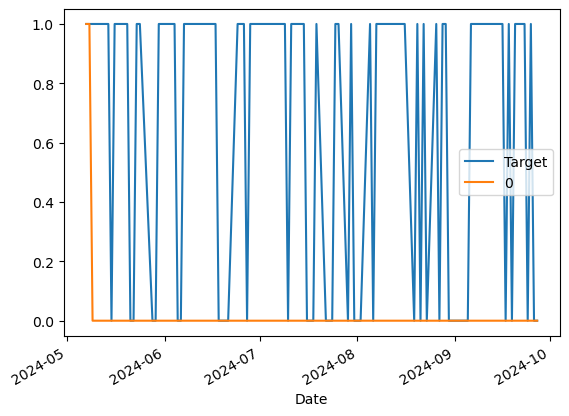

In [20]:
combined.plot()

In [22]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [28]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [29]:
predictions = backtest(sp500, model, predictors)

In [31]:
predictions["Predictions"].value_counts()

Predictions
0    823
1    386
Name: count, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])

0.4948186528497409

In [33]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.548387
0    0.451613
Name: count, dtype: float64

In [36]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]



In [38]:
sp500 = sp500.dropna()

In [39]:
sp500

,Open,High,Low,Close,Volume,Capital Gains,Tomorrow,target,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
2013-12-23 00:00:00-05:00,150.854278,151.011377,150.540093,150.920425,85598000,0.0,151.251221,1,1,1.002664,2.0,1.010682,3.0,1.040945,33.0,1.127873,144.0,1.400638,561.0
2013-12-24 00:00:00-05:00,150.928759,151.317368,150.920495,151.251221,45368800,0.0,152.020126,1,1,1.001095,2.0,1.007048,4.0,1.041659,34.0,1.129112,145.0,1.402865,561.0
2013-12-26 00:00:00-05:00,151.590174,152.102814,151.573646,152.020126,63365000,0.0,152.011917,0,0,1.002535,2.0,1.008679,4.0,1.045423,34.0,1.133548,146.0,1.409142,561.0
2013-12-27 00:00:00-05:00,152.218624,152.284759,151.854818,152.011917,61814000,0.0,151.987106,0,0,0.999973,1.0,1.004942,4.0,1.043825,34.0,1.132251,145.0,1.408217,560.0
2013-12-30 00:00:00-05:00,152.028438,152.152469,151.788664,151.987106,56857000,0.0,152.706436,1,1,0.999918,0.0,1.002301,3.0,1.041968,34.0,1.130934,144.0,1.407143,559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20 00:00:00-04:00,567.840027,569.309998,565.169983,568.250000,77503100,0.0,569.669983,1,1,0.999135,1.0,1.007666,3.0,1.034748,37.0,1.140500,149.0,1.343521,537.0
2024-09-23 00:00:00-04:00,569.340027,570.330017,568.099976,569.669983,44116900,0.0,571.299988,1,1,1.001248,1.0,1.007130,3.0,1.036548,37.0,1.142037,149.0,1.346071,537.0
2024-09-24 00:00:00-04:00,570.479980,571.359985,567.599976,571.299988,46805700,0.0,570.039978,0,0,1.001429,2.0,1.006470,3.0,1.038608,38.0,1.143919,150.0,1.349115,537.0


In [41]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [42]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [43]:
predictions = backtest(sp500, model, new_predictors)

In [45]:
predictions["Predictions"].value_counts()

Predictions
0.0    186
1.0     22
Name: count, dtype: int64

In [46]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6818181818181818